# Record Embedding

In [1]:
import pandas as pd
import numpy as np
import os
import calendar
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

## Read and Format Data
We will be using a dataset containing book data from Amazon. I scraped this dataset off Amazon. It contains about 3400 tuples of various datatypes.

In [2]:
datasetDir = "dataset/"

Read the data

In [3]:
df = pd.read_csv(os.path.join(datasetDir, "amazon.csv"), index_col=0, dtype=object)

In [4]:
df.head()

,Name,Author,Rating,Format,Publisher,Pages,Publishing Date,ISBN-10,ISBN-13
ID,,,,,,,,,
1101965355,Age of Myth: Book One of The Legends of the Fi...,Michael J. Sullivan,4.5 out of 5 stars,Paperback,Del Rey,464 pages,"January 31, 2017",1101965355,978-1101965351
1632911574,Rise of the Dragons (Kings and Sorcerers--Book 1),Morgan Rice,4.1 out of 5 stars,Hardcover,Morgan Rice,217 pages,"August 4, 2017",1632911574,978-1632911575
1470008955,The Book of Deacon (Volume 1),Joseph Lallo,4.3 out of 5 stars,Kindle,CreateSpace Independent Publishing Platform,322 pages,"March 18, 2012",1470008955,978-1470008956
1939416205,A Quest of Heroes: Book #1 in the Sorcerer's Ring,Morgan Rice,3.6 out of 5 stars,Hardcover,Morgan Rice,234 pages,"December 3, 2012",1939416205,978-1939416209
0435086219,Fantasia: An Algerian Cavalcade,Dorothy S. Blair,4.2 out of 5 stars,Kindle,Heinemann; 1 edition,227 pages,"March 15, 1993",0435086219,978-0435086213


Data cleaning and formatting

In [5]:
df['Rating'] = df['Rating'].str[0:3]
df['Pages'] = df['Pages'].str[0:4]
df['Pages'] = df['Pages'].str.strip()

In [6]:
df.head()

,Name,Author,Rating,Format,Publisher,Pages,Publishing Date,ISBN-10,ISBN-13
ID,,,,,,,,,
1101965355,Age of Myth: Book One of The Legends of the Fi...,Michael J. Sullivan,4.5,Paperback,Del Rey,464,"January 31, 2017",1101965355,978-1101965351
1632911574,Rise of the Dragons (Kings and Sorcerers--Book 1),Morgan Rice,4.1,Hardcover,Morgan Rice,217,"August 4, 2017",1632911574,978-1632911575
1470008955,The Book of Deacon (Volume 1),Joseph Lallo,4.3,Kindle,CreateSpace Independent Publishing Platform,322,"March 18, 2012",1470008955,978-1470008956
1939416205,A Quest of Heroes: Book #1 in the Sorcerer's Ring,Morgan Rice,3.6,Hardcover,Morgan Rice,234,"December 3, 2012",1939416205,978-1939416209
0435086219,Fantasia: An Algerian Cavalcade,Dorothy S. Blair,4.2,Kindle,Heinemann; 1 edition,227,"March 15, 1993",0435086219,978-0435086213


In [7]:
len(df)

3387

In [8]:
df = df[['Name', 'Author', 'Format', 'Publisher', 'Publishing Date']]

In [9]:
df.head()

,Name,Author,Format,Publisher,Publishing Date
ID,,,,,
1101965355,Age of Myth: Book One of The Legends of the Fi...,Michael J. Sullivan,Paperback,Del Rey,"January 31, 2017"
1632911574,Rise of the Dragons (Kings and Sorcerers--Book 1),Morgan Rice,Hardcover,Morgan Rice,"August 4, 2017"
1470008955,The Book of Deacon (Volume 1),Joseph Lallo,Kindle,CreateSpace Independent Publishing Platform,"March 18, 2012"
1939416205,A Quest of Heroes: Book #1 in the Sorcerer's Ring,Morgan Rice,Hardcover,Morgan Rice,"December 3, 2012"
0435086219,Fantasia: An Algerian Cavalcade,Dorothy S. Blair,Kindle,Heinemann; 1 edition,"March 15, 1993"


Add two more datasets.

In [19]:
# Function to format date as earlier format
def dateFormatter(dateVal):
    if dateVal is not None:
        year, month, day = dateVal.split('-')
        return str(calendar.month_name[int(month)]) + " " + str(day) + ", " + str(year)

In [22]:
def cleandf(df):
    df = df.rename(columns={'author':'Author','avg_rating':'Rating','book_format':'Format','book_name':'Name', 'count_pages':'Pages','date_published':'Publishing Date','publisher':'Publisher'})
    df.drop(['book_name_alt','id','source'], axis=1, inplace=True)
    df['Publishing Date'] = df['Publishing Date'].str[0:10]
    df['Format'] = df['Format'].str.replace('Kindle Edition','Kindle')
    df['Publishing Date'] = df['Publishing Date'].apply(dateFormatter)
    df = df[['Name','Author','Format','Publisher','Publishing Date']]
    return df

In [23]:
df_fantasy = pd.read_json(os.path.join(datasetDir, "goodreads-fantasy-adv.json"), dtype=object, encoding='utf8')
df_fantasy = cleandf(df_fantasy)

In [24]:
df_fiction = pd.read_json(os.path.join(datasetDir, "goodreads-fiction.json"), dtype=object, encoding='utf8')
df_fiction = cleandf(df_fiction)

In [25]:
df = df.append(df_fantasy, ignore_index=True)
df = df.append(df_fiction, ignore_index=True)
df = df.drop_duplicates('Name')

In [26]:
len(df)

8085

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8085 entries, 0 to 8279
Data columns (total 5 columns):
Name               8085 non-null object
Author             8085 non-null object
Format             7951 non-null object
Publisher          7692 non-null object
Publishing Date    7633 non-null object
dtypes: object(5)
memory usage: 379.0+ KB


In [28]:
df = df.dropna()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7604 entries, 0 to 8279
Data columns (total 5 columns):
Name               7604 non-null object
Author             7604 non-null object
Format             7604 non-null object
Publisher          7604 non-null object
Publishing Date    7604 non-null object
dtypes: object(5)
memory usage: 356.4+ KB


In [30]:
df.to_csv("amazonCleaned.csv",index=False, encoding='utf8')

In [31]:
df.head()

,Name,Author,Format,Publisher,Publishing Date
0,Age of Myth: Book One of The Legends of the Fi...,Michael J. Sullivan,Paperback,Del Rey,"January 31, 2017"
1,Rise of the Dragons (Kings and Sorcerers--Book 1),Morgan Rice,Hardcover,Morgan Rice,"August 4, 2017"
2,The Book of Deacon (Volume 1),Joseph Lallo,Kindle,CreateSpace Independent Publishing Platform,"March 18, 2012"
3,A Quest of Heroes: Book #1 in the Sorcerer's Ring,Morgan Rice,Hardcover,Morgan Rice,"December 3, 2012"
4,Fantasia: An Algerian Cavalcade,Dorothy S. Blair,Kindle,Heinemann; 1 edition,"March 15, 1993"


## Exploration using the Gensim library
Details here: https://radimrehurek.com/gensim/

In [32]:
from gensim.models import Word2Vec
import gensim

import warnings
warnings.filterwarnings('ignore')

D:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Convert each tuple into a row

In [51]:
import fasttext

In [33]:
names = df['Name'].tolist()
authors = df['Author'].tolist()
publishers = df['Publisher'].tolist()
dates = df['Publishing Date'].tolist()
formats = df['Format'].tolist()

combined = list(zip(names, authors, publishers, dates, formats))

In [34]:
len(combined)

7604

In [53]:
combined[0]

('Age of Myth: Book One of The Legends of the First Empire',
 'Michael J. Sullivan',
 'Del Rey',
 'January 31, 2017',
 'Paperback')

In [44]:
# train model
bigram_transformer = gensim.models.Phrases(combined, delimiter=b' ')
model = Word2Vec(bigram_transformer[combined], sg=0, min_count=1, workers=8, iter=1000)

100 dimensional vectors.

In [68]:
#train fasttext - cbow
from gensim.models import FastText
model_fast = FastText(combined, min_count=1)
print(model_fast['Tor Fantasy'])

[ 1.1642971  -0.59466267 -0.80502415 -1.3817446   1.6796887   1.0787936
  1.854809    0.08026646 -0.06471434  0.35144046  0.94771236 -0.07937316
  0.32806036 -0.03069263 -0.97268295 -2.8273048  -0.4440751   0.7350529
 -1.0597057   1.7180008  -0.15364671  1.2717967   1.6349794   0.74576443
  0.8604648  -0.7897733  -0.99793667 -1.5300349   0.21380122 -0.47914946
 -0.7516996  -0.6598806  -0.22127068 -0.50984484 -0.5471593   0.5125799
  0.9353317  -1.4130648  -1.2791232  -0.33885044 -0.7766111  -0.03585296
  0.6016818  -0.9321051   1.178782    0.34332317 -0.50003284 -2.7196965
 -1.163014   -0.5683309  -1.5998389  -0.881846   -1.354614    0.07203551
  0.01098767  1.9568691   0.31300703 -1.1534942  -1.6546124  -2.5969288
 -1.1882563  -1.4762845  -0.5978866   1.0682261   0.08309305  1.8384753
  1.0591956  -1.4568413   0.7701749  -0.29403195  1.4245244   1.7442129
  0.18107751 -0.42040673  1.3225088   1.7552133   1.0445666  -0.8232471
  0.897069   -0.9880441  -0.6520234  -1.4119477   0.0378789

In [45]:
print(model['Tor Fantasy'])

[ 0.2918653   1.036462   -2.9829066   2.827403    2.1172063   0.40481675
  2.618774    0.64741886  1.4469794  -1.5190475  -2.3837335  -1.141003
  0.39626047  3.6794994   1.8485261  -2.4078236  -2.878958    0.53904355
 -0.7571841   1.2275033   2.8773534  -1.3503976  -1.3971003   0.5116709
  0.3780225   1.3830718  -0.02907653 -0.5543849   3.2909694   2.2790563
 -3.2142675  -0.48048592  2.6259656   0.79774785 -2.2662725  -3.264922
 -1.2670002  -2.7926025   1.7439749   3.4628317  -0.9546524   2.2443042
 -0.5547624  -1.0416383   2.2985075  -0.23572508  1.8933258   1.6737795
 -2.033807    2.2261853   1.4127231  -3.6496172   1.88241    -0.34093547
  0.4412899   0.13004662  0.02882344 -2.2792764  -2.104117   -0.2156749
  2.8275197  -2.4245665   0.26749173  1.5975828   1.067668   -2.2796495
  2.682822   -0.3833733   2.0702486  -0.20002049 -0.02986556 -1.3145252
  1.6307061   2.5093446  -2.9158516  -2.199234    1.5300459   0.4678171
  1.8265276   1.1120784  -0.9255869   1.2223561   2.7869575  -0

In [46]:
print(model)

Word2Vec(vocab=18473, size=100, alpha=0.025)


In [73]:
#fasttext
#print(model_fasttext)
print(model_fast.most_similar("Harry Potter"))

[('Sophie Jordan', 0.9997011423110962), ('Nadia Hashimi', 0.9997004866600037), ('Clarkson Potter', 0.9996960759162903), ('Joe Schwarcz', 0.999692976474762), ('Complete Scoundrel', 0.9996926784515381), ("Daniel O'Brien", 0.9996902942657471), ('Kelly McCullough', 0.9996896386146545), ('John Ringo', 0.9996857047080994), ('John Dolan', 0.999685525894165), ('Wisdom Tales', 0.9996839761734009)]


In [47]:
X = model[model.wv.vocab]

In [48]:
len(X)

18473

In [64]:
model.most_similar("Tor Fantasy")

AttributeError: 'WordVectorModel' object has no attribute 'most_similar'

In [50]:
model.most_similar('March 3, 2015')

[('March 2, 2010', 0.7898805141448975),
 ('June 26, 2018', 0.76038658618927),
 ('August 7, 2012', 0.7585204839706421),
 ('February 2, 2016', 0.7519126534461975),
 ('November 1, 2011', 0.7494639158248901),
 ('August 30, 2016', 0.7494043707847595),
 ('June 3, 2008', 0.7482483386993408),
 ('December 31, 2013', 0.7466140985488892),
 ('September 1, 2015', 0.74605393409729),
 ('June 1, 2004', 0.7396240234375)]

In [546]:
model.most_similar('The Way of Kings')

[('The Well of Ascension (Mistborn, Book 2)', 0.9294908046722412),
 ('May 24, 2011', 0.8988550901412964),
 ('The Hero of Ages: Book Three of Mistborn', 0.8968599438667297),
 ('Shadows of Self: A Mistborn Novel', 0.8939437866210938),
 ('Return of the Crimson Guard: A Novel of the Malazan Empire (Novels of the Malazan Empire)',
  0.8777377605438232),
 ('The Alloy of Law: A Mistborn Novel', 0.8743129372596741),
 ('An Echo in the Bone: A Novel (Outlander)', 0.8600821495056152),
 ('Kim Newman', 0.8592410683631897),
 ('Alcatraz contre les traîtres de Nalhalla (Alcatraz tome 3)',
  0.854509174823761),
 ('Alcatraz contre les ossements du scribe (Alcatraz tome 2)',
  0.8533738851547241)]

In [556]:
model.save("amazonModel.w2v")

In [579]:
df.loc[df['Author'] == "Brandon Sanderson"]

,Name,Author,Format,Publisher,Publishing Date
477,The Way of Kings,Brandon Sanderson,Kindle,Tor Fantasy; Reprint edition,"May 24, 2011"
632,Words of Radiance: Book Two of the Stormlight ...,Brandon Sanderson,Hardcover,Tor Fantasy,"March 3, 2015"
804,Arcanum Unbounded: The Cosmere Collection,Brandon Sanderson,Hardcover,Tor Fantasy,"February 27, 2018"
809,Shadows of Self: A Mistborn Novel,Brandon Sanderson,Hardcover,Tor Fantasy; Reprint edition,"October 4, 2016"
1084,"Mistborn Trilogy Boxed Set (Mistborn, The Hero...",Brandon Sanderson,Paperback,Tor Fantasy; Box edition,"November 3, 2009"
1900,The Bands of Mourning: A Mistborn Novel,Brandon Sanderson,Kindle,Tor Fantasy,"January 3, 2017"
1941,The Alloy of Law: A Mistborn Novel,Brandon Sanderson,Paperback,Tor Fantasy; Reprint edition,"October 30, 2012"
1952,"The Well of Ascension (Mistborn, Book 2)",Brandon Sanderson,Kindle,Tor Fantasy; Reprint edition,"June 3, 2008"
2183,The Hero of Ages: Book Three of Mistborn,Brandon Sanderson,Kindle,Tor Fantasy; Reprint edition,"April 28, 2009"
2920,Oathbringer: Book Three of the Stormlight Archive,Brandon Sanderson,Hardcover,Tor Books; Reprint edition,"October 30, 2018"


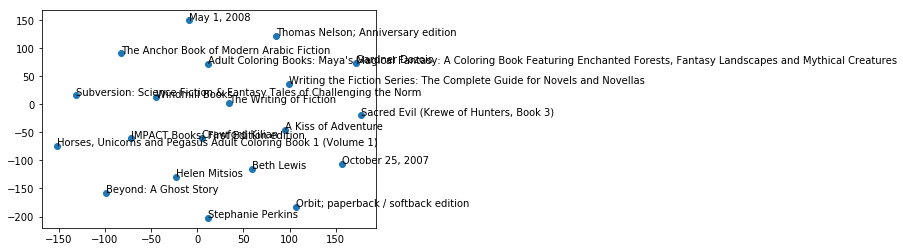

In [562]:
cutoff = 20
X = model[model.wv.vocab]
X = X[:cutoff]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

words = list(model.wv.vocab)
words = words[:cutoff]
for i, word in enumerate(words):
    plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]))
plt.show()

In [563]:
w2v_model = gensim.models.word2vec.Word2Vec.load("amazonModel.w2v")
print("Model loaded")

Model loaded


In [566]:
#Select 10000 words from our vocabulary
from __future__ import absolute_import, division, print_function
import numpy as np
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 100), dtype='float64')
word_list = []
i = 0
for word in w2v_model.wv.vocab:
    word_vectors_matrix[i] = w2v_model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (10000, 100)


In [567]:
#Compress the word vectors into 2D space
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (10000, 2)


In [568]:
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")

Points DataFrame built


In [569]:
points.head(10)

,word,x,y
0,IMPACT Books; First Edition edition,30.744547,26.980755
1,The Anchor Book of Modern Arabic Fiction,-42.196926,55.792873
2,Thomas Nelson; Anniversary edition,-69.450714,-0.329012
3,A Kiss of Adventure,-18.472881,-17.511463
4,"February 16, 2012",56.617870,-37.640396
5,"Sacred Evil (Krewe of Hunters, Book 3)",-45.343891,-18.549316
6,"Polidori's Vampyre by John Polidori, Fiction, ...",28.179657,61.456299
7,Adult Coloring Books: Maya's Magical Fantasy: ...,-46.179943,-76.173866
8,Orbit; paperback / softback edition,-27.291151,-35.657715
9,Crawford Kilian,27.067989,47.761631


In [570]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster")

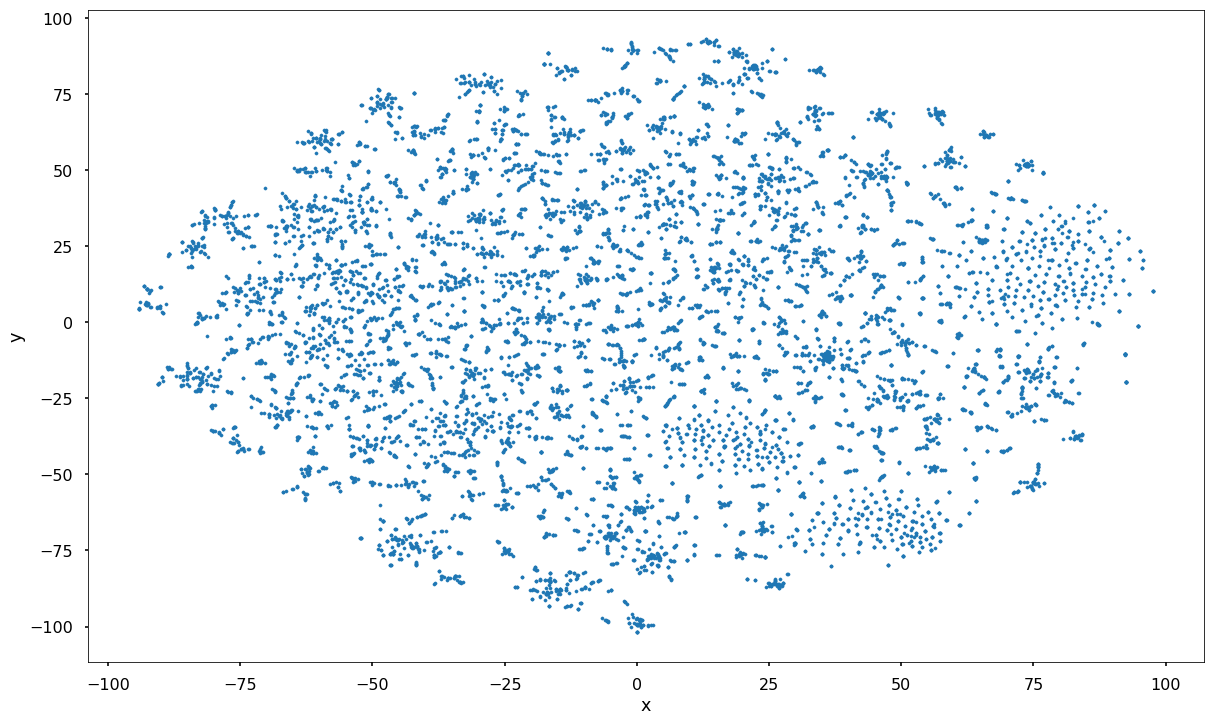

In [571]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [574]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1]) 
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [576]:
plot_region(x_bounds=(-2.2, -2.0), y_bounds=(-2.25, -2))

ValueError: scatter requires x column to be numeric